In [38]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import PIL
from tensorflow.keras.models import load_model


In [15]:
tf.__version__

'2.5.0'

In [ ]:
# Checking if GPU is Enabled
tf.test.is_gpu_available()

# Data Augumentation

creating more data from existing data

In [ ]:
#Resizing and Rescaling

In [18]:
batch_size=16

training_datagenarator= ImageDataGenerator(rescale=1./255,horizontal_flip=True,
                                           vertical_flip=True,shear_range=0.2,
                                           zoom_range=0.2,width_shift_range=0.2,
                                           height_shift_range=0.2,validation_split=0.10)

In [ ]:
# dividing the data into training and validation

In [20]:
train=training_datagenarator.flow_from_directory(r'C:\Users\sai\OneDrive\Desktop\fire detection\trainning data',
                                                target_size=(224, 224),color_mode='rgb',
                                                class_mode='binary', batch_size=batch_size,subset='training')

validation=training_datagenarator.flow_from_directory(r'C:\Users\sai\OneDrive\Desktop\fire detection\trainning data',
                                                target_size=(224, 224),color_mode='rgb',
                                                class_mode='binary', batch_size=batch_size,subset='validation')

Found 1376 images belonging to 2 classes.
Found 152 images belonging to 2 classes.


# CNN

In [21]:
# Initializing CNN
cnn=tf.keras.models.Sequential()

# adding first layer
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[224,224,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

# adding second layer
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

# adding third layer
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

# Flattening
cnn.add(tf.keras.layers.Flatten())

# Fully connected layer
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

# Output layers
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [22]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 256)       147712    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 256)       0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0

# Training The CNN Model

compile and train

In [28]:
checkpoint=tf.keras.callbacks.ModelCheckpoint(r'C:\Users\sai\OneDrive\Desktop\fire detection\Models\model.h5',
                                             monitor='val_loss',mode="min",
                                             save_best_only=True)
callbacks=checkpoint

In [29]:
cnn.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

cnn.fit_generator(train,validation_data=validation,epochs=1,
                  steps_per_epoch=train.samples//batch_size,
                  validation_steps=validation.samples//batch_size,
                  callbacks=callbacks 
                 )

C:\Users\sai\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


86/86 [==============================] - 80s 928ms/step - loss: 0.3547 - accuracy: 0.8568 - val_loss: 0.3997 - val_accuracy: 0.8264


# Testing

In [39]:
cnn=load_model(r'C:\Users\sai\OneDrive\Desktop\fire detection\Models\model.h5')

In [31]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 256)       147712    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 256)       0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0

In [41]:
image_for_testing=r'C:\Users\sai\OneDrive\Desktop\fire detection\trainning data\fire_images\fire.348.png'

# for non fire

#image_for_testing=r'C:\Users\sai\OneDrive\Desktop\fire detection\trainning data\non fire\258.jpg'


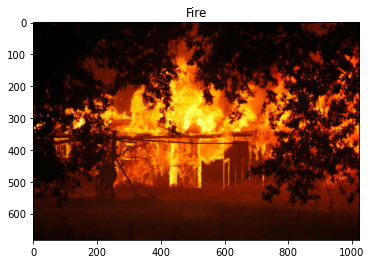

In [42]:
test_image=image.load_img(image_for_testing,target_size=(224,224))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=cnn.predict_classes(test_image)

Catagories=['Fire','Non_Fire']

image_show=PIL.Image.open(image_for_testing)
plt.imshow(image_show)

plt.title(Catagories[int(result[0][0])])
plt.show()